In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the dataset
url = 'kaggle_london_house_price_data.csv'
df = pd.read_csv(url)
print(df.columns)  # Inspect column names

Index(['fullAddress', 'postcode', 'country', 'outcode', 'latitude',
       'longitude', 'bathrooms', 'bedrooms', 'floorAreaSqM', 'livingRooms',
       'tenure', 'propertyType', 'currentEnergyRating',
       'rentEstimate_lowerPrice', 'rentEstimate_currentPrice',
       'rentEstimate_upperPrice', 'saleEstimate_lowerPrice',
       'saleEstimate_currentPrice', 'saleEstimate_upperPrice',
       'saleEstimate_confidenceLevel', 'saleEstimate_ingestedAt',
       'saleEstimate_valueChange.numericChange',
       'saleEstimate_valueChange.percentageChange',
       'saleEstimate_valueChange.saleDate', 'history_date', 'history_price',
       'history_percentageChange', 'history_numericChange'],
      dtype='object')


In [2]:
print("Count of unique values in 'outcode':", len(df['outcode'].unique()))

import re

def create_outcode_mapping1(outcodes_column):
    result = {}
    unique_adjusted_outcodes = set([re.sub(r'\d+', '', outcode) for outcode in outcodes_column])
    adjust_to_num = { outcode: outcode_index for outcode_index, outcode in enumerate(unique_adjusted_outcodes) }
    result = { outcode: adjust_to_num[re.sub(r'\d+', '', outcode)] for outcode in outcodes_column }
    return result

def create_outcode_mapping2(outcodes_column):
    next_mapping = 0
    result = {}
    adjusted_mapping = {}
    for outcode in outcodes_column:
        if not outcode in result:
            chars_only = re.sub(r'\d+', '', outcode)
            if not chars_only in adjusted_mapping:
                adjusted_mapping[chars_only] = next_mapping
                next_mapping += 1
            result[outcode] = adjusted_mapping[chars_only]
    return result

#outcode_to_numbers = create_outcode_mapping1(df['outcode'])
#print(len(outcode_to_numbers), outcode_to_numbers)
#print(len(set(outcode_to_numbers.values())))

#outcode_to_numbers = create_outcode_mapping2(df['outcode'])
#print(len(outcode_to_numbers), outcode_to_numbers)
#print(len(set(outcode_to_numbers.values())))

#filtered_outcodes = df.dropna(axis='index', subset='outcode')['outcode']  # Drop rows with missing values and take just one column
#outcode_mapping = create_outcode_mapping1(filtered_outcodes)
#outcode_numbers = [ outcode_mapping[outcode] for outcode in filtered_outcodes]
#print(len(outcode_numbers), outcode_numbers)

Count of unique values in 'outcode': 168


In [3]:
# Data preprocessing
df = df.dropna(subset=['longitude', 'saleEstimate_currentPrice'])  # Drop rows with missing values
X = df['longitude'].values.reshape(-1, 1)  # Feature: Size in square meters
df = df.dropna(subset=['longitude', 'saleEstimate_currentPrice'])  # Drop rows with missing values
y = df['saleEstimate_currentPrice'].values    # Target: Current sale price



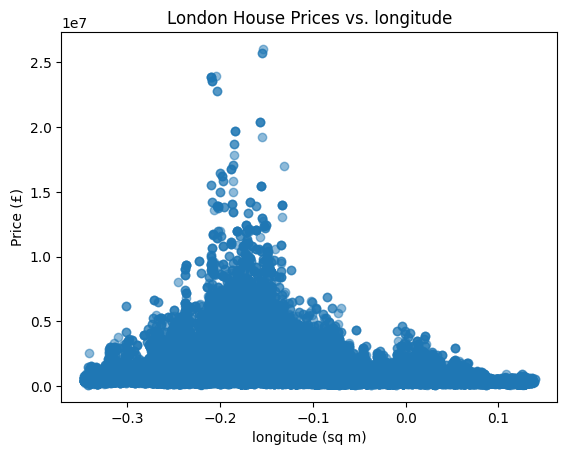

In [4]:
# Exploratory Data Analysis
plt.scatter(X, y, alpha=0.5)
plt.title('London House Prices vs. longitude')
plt.xlabel('longitude (sq m)')
plt.ylabel('Price (£)')
plt.show()

In [5]:
# Modeling
model = LinearRegression()
model.fit(X, y)

LinearRegression()

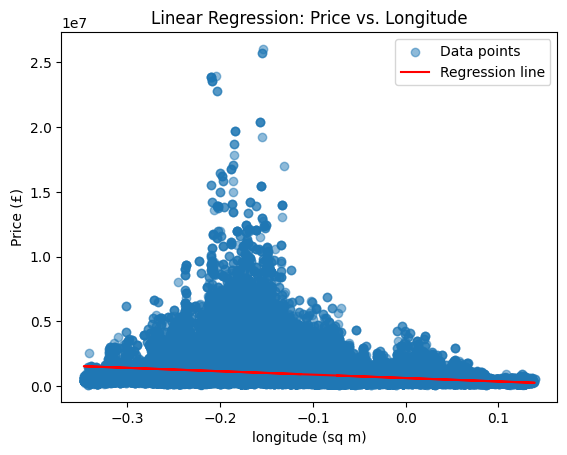

In [6]:
# Visualization with regression line
plt.scatter(X, y, alpha=0.5, label='Data points')
plt.plot(X, model.predict(X), color='red', label='Regression line')
plt.title('Linear Regression: Price vs. Longitude')
plt.xlabel('longitude (sq m)')
plt.ylabel('Price (£)')
plt.legend()
plt.show()

In [7]:
a=model.coef_[0]
b=model.intercept_
print(f"y={a}x+{b}")

y=-2625397.0897128894x+619513.9054905014


In [8]:
# Mapping energy ratings to numerical values
energy_rating_mapping = {
    'A': 0,
    'B': 1,
    'C': 2,
    'D': 3,
    'E': 4,
    'F': 5,
    'G': 6
}

In [9]:
print("Mapping of 'currentEnergyRating':", df['currentEnergyRating'].map(energy_rating_mapping).fillna(7).unique())

Mapping of 'currentEnergyRating': [7. 3. 4. 2. 1. 6. 5. 0.]


In [10]:
# Replace the values in 'currentEnergyRating' column and handle NaN using .loc
df['currentEnergyRating'] = df['currentEnergyRating'].map(energy_rating_mapping).fillna(7)

# Check the result
print("Updated unique values in 'currentEnergyRating':", df['currentEnergyRating'].unique())


Updated unique values in 'currentEnergyRating': [7. 3. 4. 2. 1. 6. 5. 0.]


In [11]:
# Data preprocessing
df = df.dropna(subset=['currentEnergyRating', 'saleEstimate_currentPrice'])  # Drop rows with missing values
df = df.dropna(subset=['currentEnergyRating', 'saleEstimate_currentPrice'])  # Drop rows with missing values
X = df['currentEnergyRating'].values.reshape(-1, 1)  # Feature: Size in square meters
df = df.dropna(subset=['currentEnergyRating', 'saleEstimate_currentPrice'])  # Drop rows with missing values
y = df['saleEstimate_currentPrice'].values    # Target: Current sale price

In [12]:
X = df['currentEnergyRating'].values.reshape(-1, 1)  # Feature: Size in square meters
df = df.dropna(subset=['currentEnergyRating', 'saleEstimate_currentPrice'])  # Drop rows with missing values
y = df['saleEstimate_currentPrice'].values    # Target: Current sale price

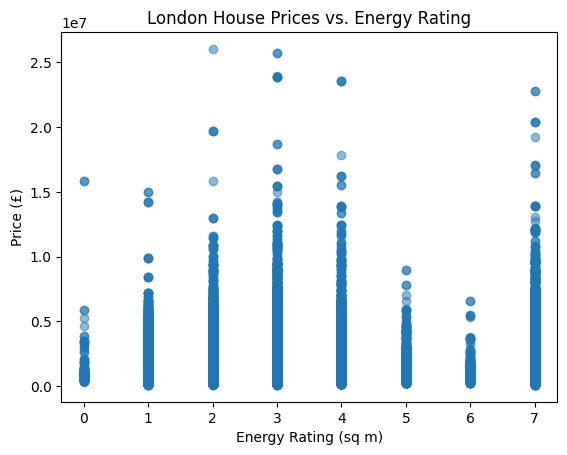

In [13]:
# Exploratory Data Analysis
plt.scatter(X, y, alpha=0.5)
plt.title('London House Prices vs. Energy Rating')
plt.xlabel('Energy Rating (sq m)')
plt.ylabel('Price (£)')
plt.show()

In [14]:
# Modeling
model = LinearRegression()
model.fit(X, y)

LinearRegression()

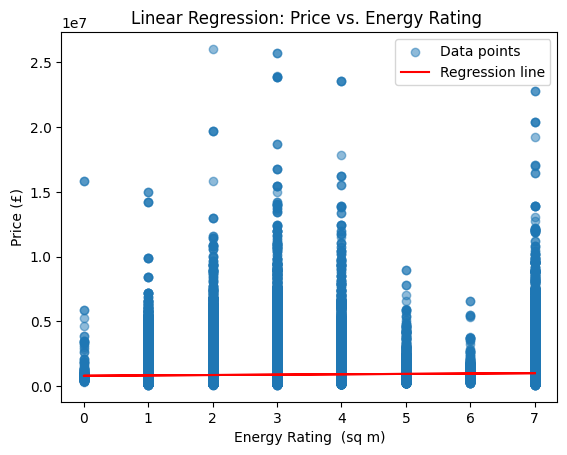

In [15]:
# Visualization with regression line
plt.scatter(X, y, alpha=0.5, label='Data points')
plt.plot(X, model.predict(X), color='red', label='Regression line')
plt.title('Linear Regression: Price vs. Energy Rating ')
plt.xlabel('Energy Rating  (sq m)')
plt.ylabel('Price (£)')
plt.legend()
plt.show()

In [16]:
#distance to wesminster #
# Define the coordinates of the center of London
west_lat = 51.494720
west_lon =-0.135278

# Calculate distance using Pythagoras' theorem (approximation)
df['distance_from_centre'] = ((df['latitude'] - west_lat)**2 + (df['longitude'] - west_lon)**2)**0.5
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 282323 entries, 0 to 282871
Data columns (total 29 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   fullAddress                                282323 non-null  object 
 1   postcode                                   282323 non-null  object 
 2   country                                    282323 non-null  object 
 3   outcode                                    282323 non-null  object 
 4   latitude                                   282323 non-null  float64
 5   longitude                                  282323 non-null  float64
 6   bathrooms                                  231372 non-null  float64
 7   bedrooms                                   256220 non-null  float64
 8   floorAreaSqM                               266633 non-null  float64
 9   livingRooms                                243328 non-null  float64
 10  tenure       

In [17]:
#calculate price per metr 
df['price_per_meter'] = ((df['saleEstimate_currentPrice'] /df['floorAreaSqM']))
df.info()
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 282323 entries, 0 to 282871
Data columns (total 30 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   fullAddress                                282323 non-null  object 
 1   postcode                                   282323 non-null  object 
 2   country                                    282323 non-null  object 
 3   outcode                                    282323 non-null  object 
 4   latitude                                   282323 non-null  float64
 5   longitude                                  282323 non-null  float64
 6   bathrooms                                  231372 non-null  float64
 7   bedrooms                                   256220 non-null  float64
 8   floorAreaSqM                               266633 non-null  float64
 9   livingRooms                                243328 non-null  float64
 10  tenure       

In [18]:
df.info()
# Final selection of columns to keep for the regression model
columns_to_keep = [
    'distance_from_centre',
    'price_per_meter',
    'latitude',
    'longitude',
    'bathrooms', 
    'bedrooms', 
    'floorAreaSqM', 
    'livingRooms', 
    'saleEstimate_currentPrice',
    'outcode'
]

# Retaining only the selected columns
df.info()
final_data = df[columns_to_keep]

## Print dataset information
print("Dataset Information (cleaned and reduced):")
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 282323 entries, 0 to 282871
Data columns (total 30 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   fullAddress                                282323 non-null  object 
 1   postcode                                   282323 non-null  object 
 2   country                                    282323 non-null  object 
 3   outcode                                    282323 non-null  object 
 4   latitude                                   282323 non-null  float64
 5   longitude                                  282323 non-null  float64
 6   bathrooms                                  231372 non-null  float64
 7   bedrooms                                   256220 non-null  float64
 8   floorAreaSqM                               266633 non-null  float64
 9   livingRooms                                243328 non-null  float64
 10  tenure       

In [19]:
final_data.head()

,distance_from_centre,price_per_meter,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,saleEstimate_currentPrice,outcode
0,0.064231,7025.316456,51.512982,-0.073698,1.0,2.0,79.0,NaN,555000.0,E1
1,0.064145,9185.185185,51.511881,-0.073471,1.0,1.0,54.0,1.0,496000.0,E1
2,0.061792,8917.808219,51.517972,-0.078028,2.0,2.0,73.0,1.0,651000.0,E1
3,0.061792,8917.808219,51.517972,-0.078028,2.0,2.0,73.0,1.0,651000.0,E1
4,0.061792,8917.808219,51.517972,-0.078028,2.0,2.0,73.0,1.0,651000.0,E1


In [20]:
# 1. Drop rows with missing values in the target variable
final_data = final_data.dropna(subset=['saleEstimate_currentPrice'])



# 2. Drop rows where "floorAreaSqM" is missing
final_data = final_data.dropna(subset=['price_per_meter','bathrooms','bedrooms','livingRooms'])

# 4. Remove rows with extreme values in "saleEstimate_currentPrice" (top and bottom 5%)
lower_bound = final_data['saleEstimate_currentPrice'].quantile(0.05)
upper_bound = final_data['saleEstimate_currentPrice'].quantile(0.95)
final_data = final_data[
    (final_data['saleEstimate_currentPrice'] >= lower_bound) &
    (final_data['saleEstimate_currentPrice'] <= upper_bound)
]

#lower_bound = final_data['distance_from_centre'].quantile(0.05)
#upper_bound = final_data['distance_from_centre'].quantile(0.95)
#final_data = final_data[
 #   (final_data['distance_from_centre'] >= lower_bound) &
  #  (final_data['distance_from_centre'] <= upper_bound)
#]

lower_bound = final_data['price_per_meter'].quantile(0.05)
upper_bound = final_data['price_per_meter'].quantile(0.95)
final_data = final_data[
    (final_data['price_per_meter'] >= lower_bound) &
    (final_data['price_per_meter'] <= upper_bound)
]

# Convert outcodes to numbers and add as a new column
final_outcodes = final_data['outcode']
outcode_mapping = create_outcode_mapping1(final_outcodes)
outcode_numbers = [ outcode_mapping[outcode] for outcode in final_outcodes]
final_data['outcode_numbers'] = outcode_numbers

#find duplicates 
#duplicates=final_data[df.duplicated()]
#print(final_data.duplicated().sum())
#print(duplicates.head(10))
# 5. Check for remaining missing values
print("Missing values after processing:")
print(final_data.isnull().sum())

Missing values after processing:
distance_from_centre         0
price_per_meter              0
latitude                     0
longitude                    0
bathrooms                    0
bedrooms                     0
floorAreaSqM                 0
livingRooms                  0
saleEstimate_currentPrice    0
outcode                      0
outcode_numbers              0
dtype: int64


In [21]:
x = final_data['distance_from_centre'].values.reshape(-1, 1)  # Feature: Size in square meters
#f = df.dropna(subset=['price_per_meter', 'saleEstimate_currentPrice'])  # Drop rows with missing values
y = final_data['price_per_meter'].values.reshape(-1, 1)  # Feature: Size in square meters
#y = final_data['saleEstimate_currentPrice'].values    # Target: Current sale price

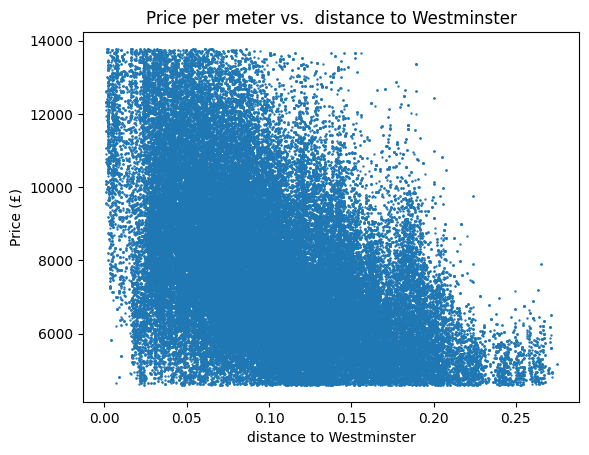

In [22]:
# Exploratory Data Analysis
plt.scatter(x, y, s=0.51)
plt.title('Price per meter vs.  distance to Westminster')
plt.xlabel('distance to Westminster')
plt.ylabel('Price (£)')
plt.show()

In [23]:
# Modeling
model = LinearRegression()
model.fit(x, y)

LinearRegression()

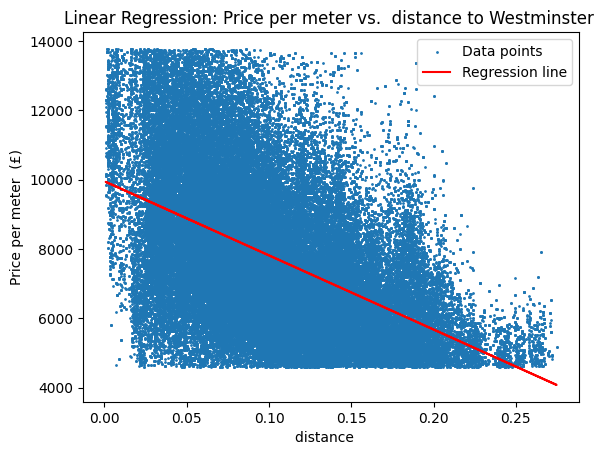

In [24]:
# Visualization with regression line
plt.scatter(x, y, s=1, label='Data points')
plt.plot(x, model.predict(x), color='red', label='Regression line')
plt.title('Linear Regression: Price per meter vs.  distance to Westminster ')
plt.xlabel('distance   ')
plt.ylabel('Price per meter  (£)')
plt.legend()
plt.show()


In [25]:
a=model.coef_[0]
b=model.intercept_
print(f"y={a}x+{b}")

y=[-21380.92175504]x+[9954.66453398]


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Разделение данных на признаки и целевую переменную
x = final_data[['distance_from_centre','floorAreaSqM','bedrooms', 'bathrooms',  'livingRooms']]
y = final_data['saleEstimate_currentPrice']

# Разделение на обучающую и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Распечатка количества данных
print("Data Distribution:")
print(f"Total samples: {len(x)}")
print(f"Training samples: {len(x_train)} ({len(x_train)/len(x)*100:.2f}%)")
print(f"Testing samples: {len(x_test)} ({len(x_test)/len(x)*100:.2f}%)")

Data Distribution:
Total samples: 176278
Training samples: 141022 (80.00%)
Testing samples: 35256 (20.00%)


In [27]:
# Training the Linear Regression model
# The model learns the relationship between the features (X_train_scaled) and the target (y_train)
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [28]:
a=model.coef_[0]
b=model.intercept_
print(f"y={a}x+{b}")

y=-1872237.836366855x+153148.1750237093


In [29]:
# Making predictions on the test set
# Using the trained model to predict the target variable for the test data
y_pred = model.predict(x_test)

In [30]:
# Evaluating model performance
# Calculating common regression metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE), and R^2 score
mae = mean_absolute_error(y_test, y_pred)  # Measures the average absolute difference between predictions and actual values
mse = mean_squared_error(y_test, y_pred)  # Measures the average squared difference between predictions and actual values
r2 = r2_score(y_test, y_pred)  # Measures how well the model explains the variance of the target variable

# Displaying the results
# Printing out the evaluation metrics to assess model performance
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error (MAE): 137429.05156433323
Mean Squared Error (MSE): 34979818355.94797
R^2 Score: 0.7605754058965977


In [31]:
#x_new = [0.1, 3000,100,4,2,1]  # Floor area in square meters (example: 75 m²)#
#print(model.predict(x_new))  # Output: predicted price for 75 m²

In [32]:
test_data = pd.DataFrame([
    [0.1, 70, 2, 1, 1],
    [0.05, 120, 3, 2, 1]
], columns=['distance_from_centre',
            'floorAreaSqM', 'bedrooms', 
            'bathrooms', 'livingRooms'])

predictions = model.predict(test_data)
print(predictions)

[ 533190.58676875 1039549.24719858]


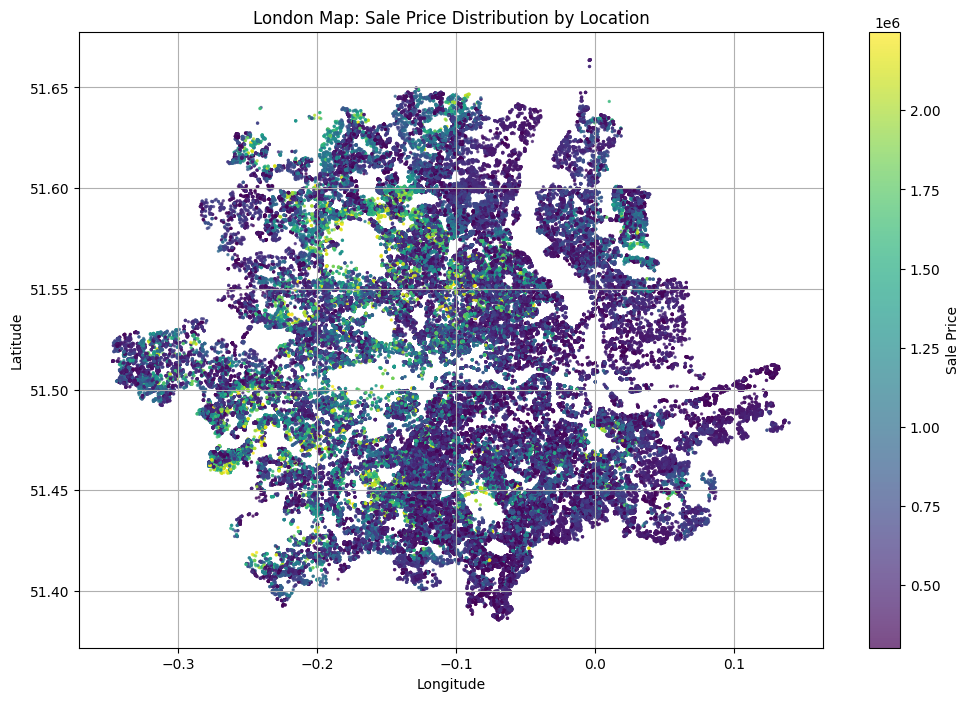

In [33]:
# Add a scatter plot on the map of London
plt.figure(figsize=(12, 8))
plt.scatter(final_data['longitude'], final_data['latitude'], c=final_data['saleEstimate_currentPrice'], cmap='viridis', s=2, alpha=0.7)
plt.colorbar(label='Sale Price')
plt.title("London Map: Sale Price Distribution by Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

In [34]:
print("Dataset Information (cleaned and reduced):")
final_data.info()

Dataset Information (cleaned and reduced):
<class 'pandas.core.frame.DataFrame'>
Index: 176278 entries, 1 to 282586
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   distance_from_centre       176278 non-null  float64
 1   price_per_meter            176278 non-null  float64
 2   latitude                   176278 non-null  float64
 3   longitude                  176278 non-null  float64
 4   bathrooms                  176278 non-null  float64
 5   bedrooms                   176278 non-null  float64
 6   floorAreaSqM               176278 non-null  float64
 7   livingRooms                176278 non-null  float64
 8   saleEstimate_currentPrice  176278 non-null  float64
 9   outcode                    176278 non-null  object 
 10  outcode_numbers            176278 non-null  int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 16.1+ MB


In [35]:
#final_data = final_data.dropna(subset=['outcode_mapping'])  # Drop rows with missing values

In [36]:
X = final_data['outcode_numbers']  # Feature: Size in square meters
y = final_data['price_per_meter'].values    # Target: Current sale price

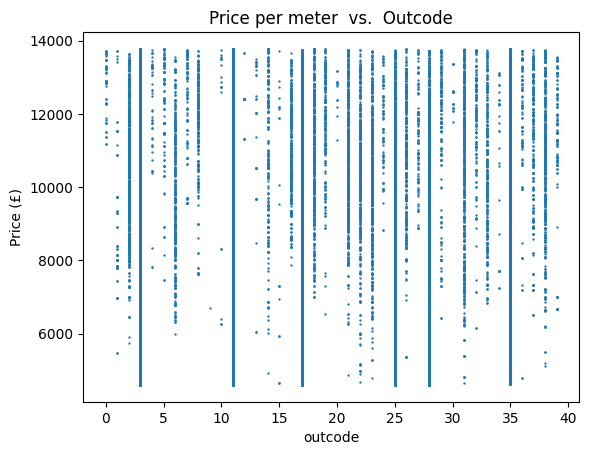

In [37]:
# Exploratory Data Analysis
plt.scatter(X, y, s=0.51)
plt.title('Price per meter  vs.  Outcode')
plt.xlabel('outcode')
plt.ylabel('Price (£)')
plt.show()

In [38]:
print(final_data.tail())

        distance_from_centre  price_per_meter   latitude  longitude  \
282516              0.024368     10801.980198  51.512085  -0.118182   
282517              0.024368     10801.980198  51.512085  -0.118182   
282518              0.024368     10801.980198  51.512085  -0.118182   
282578              0.024368     12732.142857  51.512085  -0.118182   
282586              0.019509     13696.078431  51.510264  -0.123489   

        bathrooms  bedrooms  floorAreaSqM  livingRooms  \
282516        1.0       1.0         101.0          1.0   
282517        1.0       1.0         101.0          1.0   
282518        1.0       1.0         101.0          1.0   
282578        1.0       1.0          56.0          1.0   
282586        2.0       2.0         102.0          1.0   

        saleEstimate_currentPrice outcode  outcode_numbers  
282516                  1091000.0    WC2R               27  
282517                  1091000.0    WC2R               27  
282518                  1091000.0    WC2R

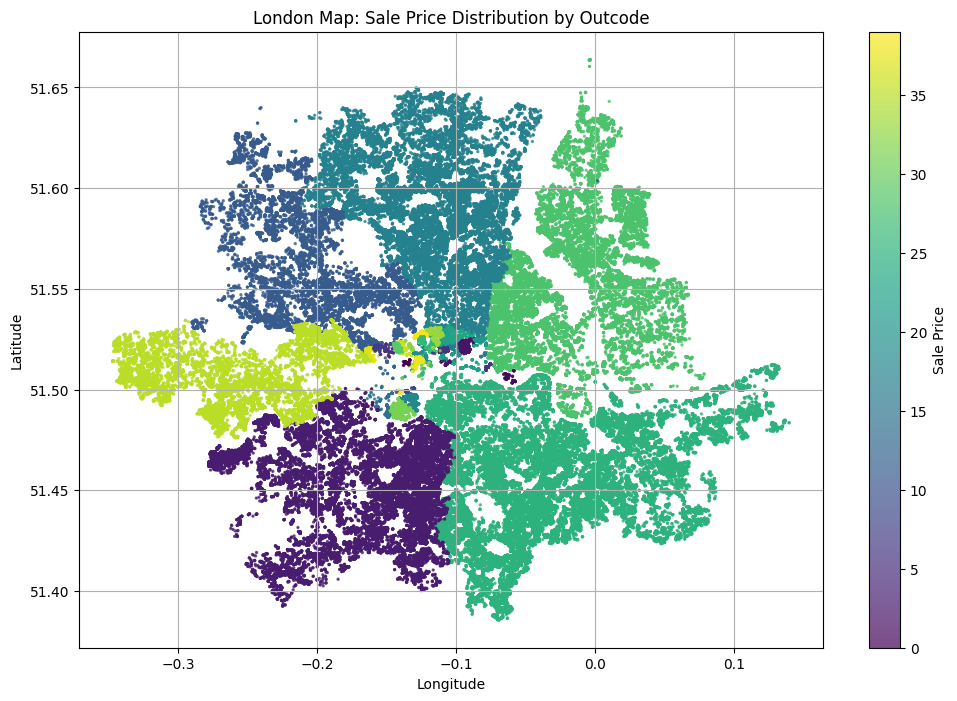

In [39]:
# Add a scatter plot on the map of London
plt.figure(figsize=(12, 8))
plt.scatter(final_data['longitude'], final_data['latitude'], c=final_data['outcode_numbers'], cmap='viridis', s=2, alpha=0.7)
plt.colorbar(label='Sale Price')
plt.title("London Map: Sale Price Distribution by Outcode")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

In [40]:
# Разделение данных на признаки и целевую переменную
x = final_data[['distance_from_centre','floorAreaSqM','bedrooms', 'bathrooms',  'livingRooms','outcode_numbers']]
y = final_data['saleEstimate_currentPrice']

# Разделение на обучающую и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Распечатка количества данных
print("Data Distribution:")
print(f"Total samples: {len(x)}")
print(f"Training samples: {len(x_train)} ({len(x_train)/len(x)*100:.2f}%)")
print(f"Testing samples: {len(x_test)} ({len(x_test)/len(x)*100:.2f}%)")

Data Distribution:
Total samples: 176278
Training samples: 141022 (80.00%)
Testing samples: 35256 (20.00%)


In [41]:
# Training the Linear Regression model with outcode_numbers
# The model learns the relationship between the features (X_train_scaled) and the target (y_train)
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [42]:
#equation of a model with outcode_numbers
a=model.coef_[0]
b=model.intercept_
print(f"y={a}x+{b}")

y=-1940385.4480782098x+141837.85170856188


In [43]:
# Making predictions on the test set with outcode
# Using the trained model to predict the target variable for the test data
y_pred = model.predict(x_test)

In [48]:
test_data = pd.DataFrame([
    [0.1, 70, 2, 1, 1,0],
    [0.1, 70, 2, 1, 1,10],
    [0.1, 70, 2, 1, 1,32],
    [0.05, 120, 3, 2, 1,11]
], columns=['distance_from_centre',
            'floorAreaSqM', 'bedrooms', 
            'bathrooms', 'livingRooms','outcode_numbers'])

predictions = model.predict(test_data)
print(predictions)

[ 516714.64667799  524971.44978531  543136.41662142 1036665.86816452]
